# Predicting Lung Cancer: Unveiling Insights from Survey Data 🚀

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading and Initial Exploration

In [ ]:
# Load the data
data = pd.read_csv('/content/survey lung cancer.csv')

# Display the first few rows of the dataset
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data Cleaning and Preprocessing

In [ ]:
# Display basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Display statistical summary of the dataset
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Clean 'GENDER' and 'LUNG_CANCER' columns
data['GENDER'] = data['GENDER'].str.strip()
data['LUNG_CANCER'] = data['LUNG_CANCER'].str.strip()

# Replace numeric values
data.replace({2: 1, 1: 0}, inplace=True)

# Map categorical values to binary for modeling
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


**Check for Missing Values and Duplicates**

In [ ]:
# Check for missing values
data.isna().sum()

# Check for duplicates and remove them
data.duplicated().sum()
data.drop_duplicates(inplace=True)

**Class Balance Check**

In [ ]:
# Check the class balance in the target variable
print("\nClass balance:")
print(data['LUNG_CANCER'].value_counts(normalize=True))


Class balance:
LUNG_CANCER
1    0.862319
0    0.137681
Name: proportion, dtype: float64


**Correlation with Target Variable**

In [ ]:
# Correlation with the target variables
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['LUNG_CANCER'].drop('LUNG_CANCER').sort_values(ascending=False).reset_index()

# Bar plot showing correlation with the target variable
fig = px.bar(correlation_with_target, x='index', y='LUNG_CANCER', title='Correlation with the target')

# Updating layout
fig.update_layout(xaxis_title = 'Features', yaxis_title = 'Correlation')
fig.show()

**Distribution of the Age**

In [ ]:
# Histogram of the age distribution
fig = px.histogram(data, x='AGE', title='Distribution of the Age', text_auto=True)
fig.show()

**Outlier Detection**

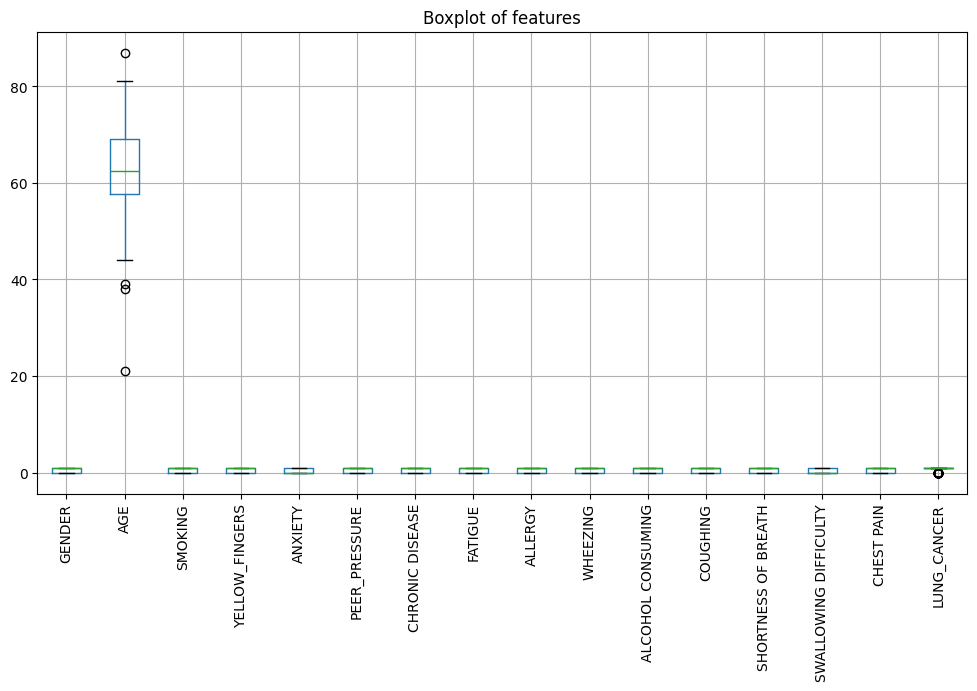

In [ ]:
# Boxplot for outlier detection in all features

plt.figure(figsize=(12,6))
data.boxplot()
plt.title('Boxplot of features')
plt.xticks(rotation=90)
plt.show()

# Train-Test Split and Feature Scaling

In [ ]:
# Splitting data into features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Handling Imbalance with SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_train_resampled, y_train_resampled)
selected_features = X.columns[rfe_selector.support_]

# Display selected features
print("\nSelected features:", selected_features)

# Transforming data to keep only selected features
X_train_selected = X_train_resampled[:, rfe_selector.support_]
X_test_selected = X_test_scaled[:, rfe_selector.support_]


Selected features: Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')


# Model Training and Evaluation

In [ ]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train models and display results
for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.93      0.85      0.89        48

    accuracy                           0.82        56
   macro avg       0.67      0.74      0.70        56
weighted avg       0.86      0.82      0.84        56


Random Forest Results:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.98      0.96      0.97        48

    accuracy                           0.95        56
   macro avg       0.88      0.92      0.90        56
weighted avg       0.95      0.95      0.95        56


SVM Results:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.92      0.96        48

    accuracy                           0.93        56
   macro avg       0.83      0.96      0.88        56
weight

# Confusion Matrix Visualization

In [ ]:
# Visualize the confusion matrix for Random Forest model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig = px.imshow(cm, text_auto=True, aspect='auto', color_continuous_scale='Blues')
fig.update_layout(title_text=f'Confusion Matrix - {name}', xaxis_title='Predicted', yaxis_title='Actual')
fig.show()

**Feature Importance (Random Forest)**

In [ ]:
# Plot feature importance for the Random Forest model
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Bar plot for feature importnace
fig = px.bar(feature_importance, x='importance', y='feature', orientation='h', title='Feature Importance for Random Forest')
fig.show()

**Logistic Regression Coefficients**

In [ ]:
# Plot coefficients from the Logistic Regression model
lr_model = models['Logistic Regression']
coef_df = pd.DataFrame({
    'feature': selected_features,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

# Bar plot for logistic regression coefficients
fig = px.bar(coef_df, x='coefficient', y='feature', orientation='h', title='Logistic Regression Coefficients')
fig.show()

# Conclusion
This analysis has shown that the selected features can significantly contribute to predicting lung cancer risk. Among the models used, the Random Forest and Logistic Regression models provided valuable insights through feature importance and coefficients, respectively. Future work could involve further hyperparameter tuning and cross-validation to enhance model performance.